# 1.BUSINESS UNDERSTANDING

### Business Problem
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

### Business Qustions
These are questions we need to ask ourselves to help us come up with objectives and conclusions on what we need to venture into:
  - Which is the best genre to venture into?
  - How does runtime vary according to different genres?
  - Who are the best Directors to consider potentially and which genres are they into?
  - Which are the best studios to consider patnering with for higher profits and audience?
  - What is the average production budget that will help us yield the highest profit?
  - Between worldwide and domestic market which will give us the most profit?

### Business Objectives
1. Understand runtime treands considering genres and ratings.
2. Potential movie directors that have the highest audience ratings.
3. Studios with the strongest record that brings the most profit.
4. Production budget that yields the most profit return.
5. Compare between the worldwide and domestic patterns which one has more profitable market.



# 2.DATA UNDERSTANDING

In [1]:
# Imports
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Create a connection to the database `im.db`
conn = sqlite3.connect('Data/im.db')
# Create a  Cursor to execute SQL statements and fetch results from SQL queries
cur = conn.cursor()

In [3]:
# This query returns a tuple containing the table’s names
for row in cur.execute("SELECT name FROM sqlite_master"):
  print(row)

('movie_basics',)
('directors',)
('known_for',)
('movie_akas',)
('movie_ratings',)
('persons',)
('principals',)
('writers',)


### Check details for different tables

In [4]:
# Use pandas to read data from the first table
df = pd.read_sql("SELECT * FROM movie_basics",conn)
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
df = pd.read_sql("SELECT * FROM directors",conn)
df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [6]:
df = pd.read_sql("SELECT * FROM persons",conn)
df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [7]:
df = pd.read_sql("SELECT * FROM movie_ratings",conn)
df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### Concatinating imporntant data

#### 1.Add ratings to movie_basics

In [8]:
queryRatings = """
SELECT 
    movie_basics.movie_id,
    movie_basics.primary_title,
    movie_basics.original_title,
    movie_basics.start_year,
    movie_basics.runtime_minutes,
    movie_basics.genres,
    movie_ratings.averagerating
FROM movie_basics
JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
"""
df = pd.read_sql(queryRatings, conn)

#### 2.Add column directors from other tables to table movie_basics

In [9]:
queryDirectors = """
SELECT 
    movie_basics.movie_id,
    persons.primary_name AS director_name
FROM movie_basics
LEFT JOIN directors
    ON movie_basics.movie_id = directors.movie_id
LEFT JOIN persons
    ON directors.person_id = persons.person_id
"""
df_dir = pd.read_sql(queryDirectors, conn)

In [10]:
# Merge the data and display the first five rows
df = df.merge(df_dir, on="movie_id", how="left")
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,director_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,Harnam Singh Rawail
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,Harnam Singh Rawail
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,Harnam Singh Rawail
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,Harnam Singh Rawail
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,Mani Kaul


In [11]:
# df.to_excel('Data/imdb.xlsx', index=False)

### Reading other `.tsv.gz` data files

In [12]:
df_tsv2 = pd.read_csv('Data/bom.movie_gross.csv.gz', compression='gzip')
df_tsv2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
df_tsv3 = pd.read_csv('Data/tn.movie_budgets.csv.gz', compression='gzip')
df_tsv3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
df.tail(20)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,director_name
182121,tt9905476,Hand Rolled,Hand Rolled,2019,90.0,Documentary,9.3,Jesse Mariut
182122,tt9905796,July Kaatril,July Kaatril,2019,NaN,Romance,9.0,K.C. Sundaram
182123,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary,8.1,Nick Willing
182124,tt9908960,Pliusas,Pliusas,2018,90.0,Comedy,4.2,Mark Goldman
182125,tt9910502,Hayatta Olmaz,Hayatta Olmaz,2019,97.0,Comedy,7.0,Emre Çaltili
182126,tt9910930,Jeg ser deg,Jeg ser deg,2019,75.0,"Crime,Documentary",6.1,Maria Salazar
182127,tt9910930,Jeg ser deg,Jeg ser deg,2019,75.0,"Crime,Documentary",6.1,Maria Salazar
182128,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,Vineesh Aaradya
182129,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,Vineesh Aaradya
182130,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,Vineesh Aaradya


### Checking  data details

In [15]:
df_tsv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [16]:
df_tsv3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182141 entries, 0 to 182140
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         182141 non-null  object 
 1   primary_title    182141 non-null  object 
 2   original_title   182141 non-null  object 
 3   start_year       182141 non-null  int64  
 4   runtime_minutes  164061 non-null  float64
 5   genres           180660 non-null  object 
 6   averagerating    182141 non-null  float64
 7   director_name    181387 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.5+ MB


# 3.DATA PREPARATION

## Data cleaning

### 1. INSPECTING DATA

#### 1.1 Check missing values

In [18]:
df_tsv2.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [19]:
df_tsv3.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [20]:
df.isna().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes    18080
genres              1481
averagerating          0
director_name        754
dtype: int64

#### 1.2 Check Shape and data Description

In [21]:
df_tsv2.shape

(3387, 5)

In [22]:
df_tsv2.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [23]:
df_tsv3.shape

(5782, 6)

In [24]:
df.shape

(182141, 8)

In [25]:
df.describe()

,start_year,runtime_minutes,averagerating
count,182141.000000,164061.000000,182141.000000
mean,2014.309249,97.775212,6.219520
std,2.535924,194.164307,1.389243
min,2010.000000,3.000000,1.000000
25%,2012.000000,84.000000,5.400000
50%,2014.000000,94.000000,6.300000
75%,2016.000000,107.000000,7.200000
max,2019.000000,51420.000000,10.000000


### 2. REMOVING DUPLICATES

#### 1. Check for dulpicates and drop the duplicated columns

In [26]:
df.duplicated()

0         False
1          True
2          True
3          True
4         False
          ...  
182136    False
182137     True
182138    False
182139     True
182140    False
Length: 182141, dtype: bool

In [27]:
df.drop_duplicates()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,director_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,Harnam Singh Rawail
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,Mani Kaul
5,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,Orson Welles
7,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,Hrishikesh Mukherjee
8,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,Raoul Ruiz
...,...,...,...,...,...,...,...,...
182132,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,Giancarlo Soldi
182134,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,Ahmet Faik Akinci
182136,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,Chris Jordan
182138,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,Laura Jou


In [28]:
df_tsv2.drop_duplicates()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [29]:
df_tsv3.drop_duplicates()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### 3. HANDLING MISSING DATA

#### 1. Check sum of missing values

In [30]:
df.isna().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes    18080
genres              1481
averagerating          0
director_name        754
dtype: int64

In [31]:
df_tsv2.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [32]:
df_tsv3.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

#### 2. Handle missing values for df

In [33]:
# Filling missing genres and directors with unknown not to create biasness
missingCols = ['genres','director_name']
for col in missingCols:
  df[col].fillna('Unknown',inplace = True)

In [34]:
# Impute missing runtime values with 0 this is because we will create biasness when trying to group genres
missingCols1= ['runtime_minutes']
for col in missingCols1:
  df[col].fillna('0',inplace = True)

In [35]:
df.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
director_name      0
dtype: int64

#### 3. Handle missing values for df_tsv2

In [36]:
# Imputing missing values with mean for the domestic gross and foreign gross
missing_cols = ['domestic_gross', 'foreign_gross']
# First, make sure the columns are numeric
for col in missing_cols:
    df_tsv2[col] = pd.to_numeric(df_tsv2[col], errors='coerce')

# Then, fill missing values with the mean
for col in missing_cols:
    df_tsv2[col].fillna(df_tsv2[col].mean(), inplace=True)


In [37]:
missingCols = ['studio']
for col in missingCols:
  df_tsv2[col].fillna('Unknown',inplace = True)

In [38]:
df_tsv2.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

#### 4.Handling string values

In [39]:
df_tsv3['production_budget'] = df_tsv3['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df_tsv3['worldwide_gross'] = df_tsv3['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)
df_tsv3['domestic_gross'] = df_tsv3['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)

In [40]:
df_tsv3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


#### 5.Dropping irrelevant columns

In [ ]:
df.dropna(subset=['start_year', 'primary_title'], inplace=True)
df_tsv2.dropna(subset=['year'], inplace=True)
# df_tsv3.dropna(subset=['release_date'], inplace=True)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,budget_bin,domestic_share
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,5.532577,200M+,0.273924
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.546673,200M+,0.230537
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-0.572108,200M+,0.285535
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,3.243841,200M+,0.327157
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,3.153696,200M+,0.471004


In [55]:
df_tsv3['release_date'] = pd.to_datetime(df_tsv3['release_date'])

In [58]:
df_tsv3['month'] = df_tsv3['release_date'].dt.month_name()
df_tsv3['Profits'] = df_tsv3['worldwide_gross']-df_tsv3['production_budget']

In [59]:
df_tsv3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,budget_bin,domestic_share,month,Profits
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,5.532577,200M+,0.273924,December,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.546673,200M+,0.230537,May,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-0.572108,200M+,0.285535,June,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,3.243841,200M+,0.327157,May,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,3.153696,200M+,0.471004,December,9.997217e+08


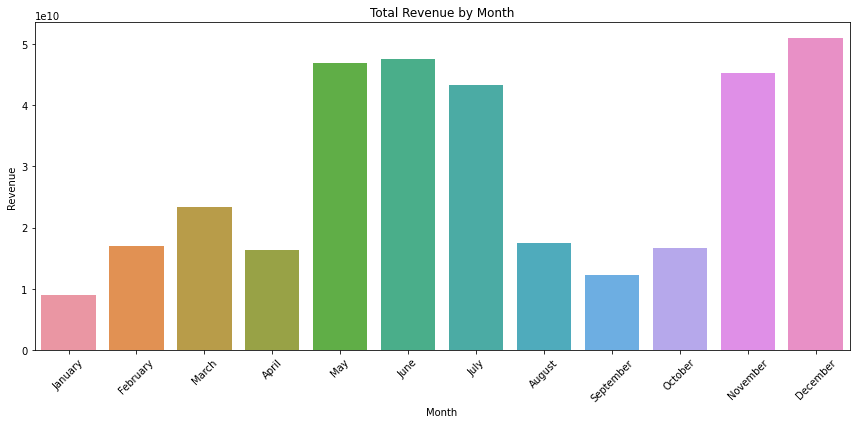

In [60]:
revenue_by_month = df_tsv3.groupby('month')['Profits'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12,6))
sns.barplot(x='month', y='Profits', data=revenue_by_month, order=month_order)

plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4.MODELING

#### 1. Statistical Data Intergration

In [42]:
from scipy.stats import ttest_ind
import pandas as pd

# Make the runtime numeric
df['runtime_minutes'] = pd.to_numeric(df['runtime_minutes'], errors='coerce')

# Split into groups shorter <120 and longer >=120
shortMovies = df[df['runtime_minutes'] < 120]['averagerating']
longMovies = df[df['runtime_minutes'] >= 120]['averagerating']

# T-test two means for the mean of the seprate groups
tValue, pValue = ttest_ind(shortMovies, longMovies)

print(f"T_Value: {tValue}, P_Value: {pValue}")

# Interpret the result
if pValue < 0.05:
    print("There is a difference between long and short movie ratings")
else:
    print("There is less difference between long and short movie ratings")

T_Value: -11.96184864866784, P_Value: 5.79207339874e-33
There is a difference between long and short movie ratings


The output of this havibg shorter movies<120 and longer movies >120 indicates that there is a great difference on average rating and it also not random indicating that runtime influences the audience


Simple Explanation:
This Python code is testing whether long movies (120+ mins) and short movies (<120 mins) have different average audience ratings.

Here's what it does:

Converts the movie runtime into a numeric format.

Splits the movies into two groups:

Short movies: less than 120 minutes

Long movies: 120 minutes or more

Compares the average ratings of these two groups using a t-test.

Prints the test results:

T-Value: -11.96

P-Value: very small (≈ 0)

Since the p-value is less than 0.05, the result is statistically significant, meaning:

The difference in ratings between short and long movies is not due to random chance.

📌 Conclusion:
There is a significant difference in audience ratings between short and long movies, suggesting that movie runtime has an influence on how audiences rate films.

Would you like help visualizing this result with a plot?

In [43]:
print("Average rating for short movies:", shortMovies.mean())
print("Average rating for Long movies:", longMovies.mean())

Average rating for short movies: 6.204136884735994
Average rating for Long movies: 6.3180030072743545


This indicates that longer movies indicate a higher rating than the shorter movies. 

#### 2. Linear regression

#### 3. Data visualization

##### Objective1 : Undertand runtime trends based on genre and rating

In [44]:
# 1. Objective1 : Undertand runtime trends based on genre and rating
# create some runtime bbuckets
bins = [0, 90, 120, 150, 180, 1000]

dataLabel = ['Short (<90)', 'Medium (90-120)', 'Long (120-150)', 'Very Long (150-180)', 'Epic (>180)']
df['runtime_category'] = pd.cut(df['runtime_minutes'], bins=bins, labels=dataLabel)

# Group by genre and runtime category
genreRunRat = df.groupby(['genres', 'runtime_category'])['averagerating'].mean().sort_values(ascending=False)

zgenre = genreRunRat.head(50)

In [45]:
# pivot the grouped data
pivotTable = zgenre.reset_index().pivot("genres", "runtime_category", "averagerating")

Text(0.5, 1.0, 'Average rating by genre and runtime')

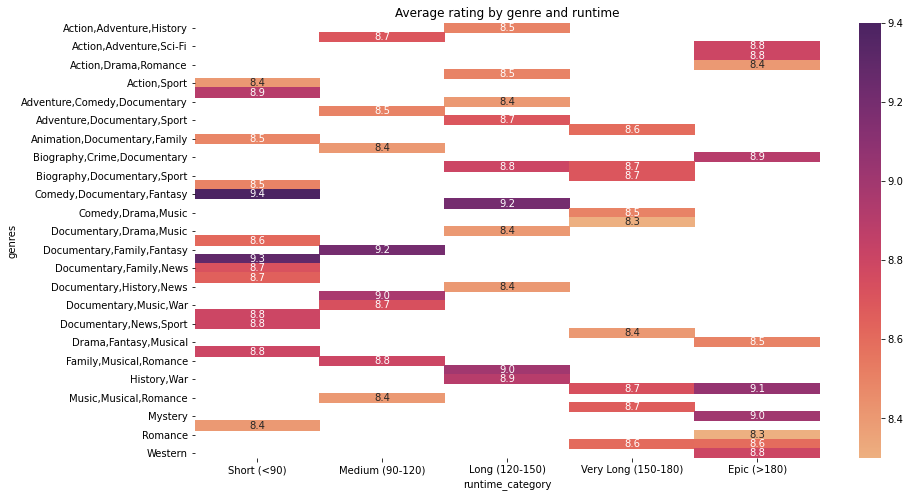

In [46]:
# PLot the first image
plt.figure(figsize = (14,8))
sns.heatmap(pivotTable, annot=True, cmap='flare', fmt='.1f')
plt.title('Average rating by genre and runtime')

This indicates that documentaries are one of the best films to venture into as they have higher audience ratings.
The heatmap shows that documentaries range from short to medium runtimes with some genres like historical having extreme runtimess.

##### Objective 2: Director Potentiality considering the average rating and Genre

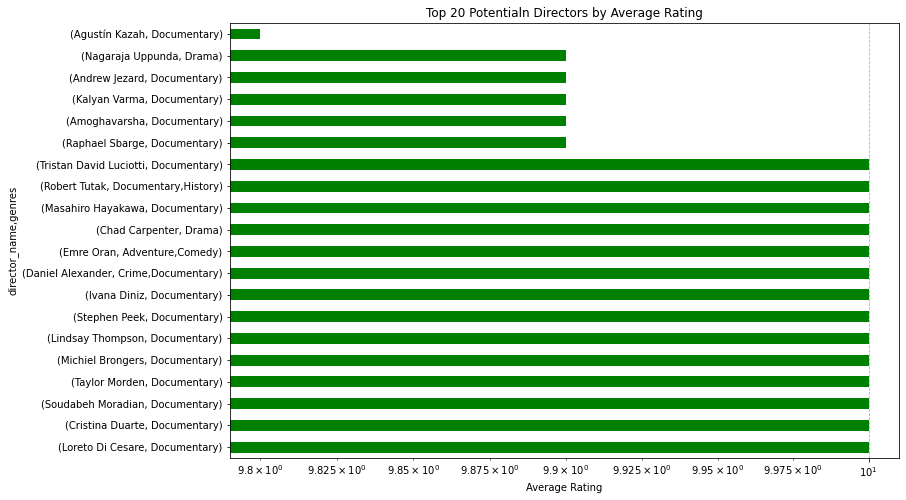

In [47]:
dAvgRating = df.groupby(['director_name','genres'])['averagerating'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,8))
dAvgRating.plot(kind='barh', color='green')
plt.title('Top 20 Potentialn Directors by Average Rating')
plt.xlabel('Average Rating')
plt.xscale('log')
plt.grid(axis='x', linestyle='--')
plt.show()

Our analysis above shows us a list of potential Directors with the highest rivies and the genre of movies they make this indicates that Documentary is one of the biggest venture with the hightest ratins

#### Objective3:Studio with the strongest track record of financail success

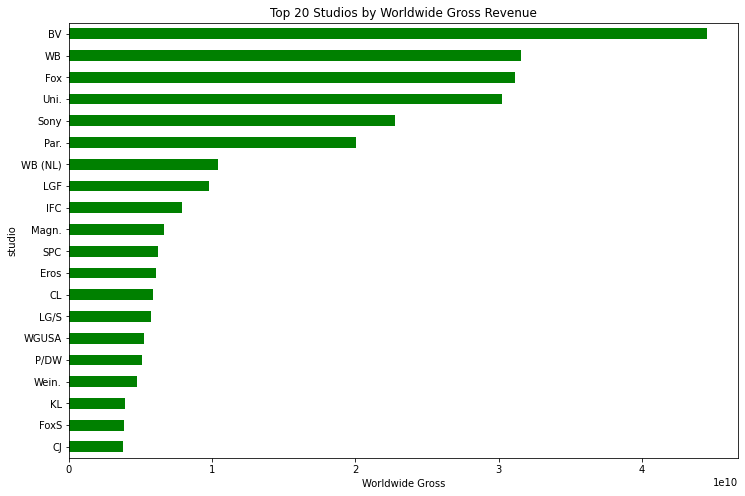

In [48]:
# Create a worldwide gross then lets see the best studio with the highest revenue
df_tsv2['worldwide_gross'] = df_tsv2['domestic_gross'] + df_tsv2['foreign_gross']
# Group by Studio
studio_gross = df_tsv2.groupby('studio')['worldwide_gross'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,8))
studio_gross.plot(kind='barh', color='green')
plt.title('Top 20 Studios by Worldwide Gross Revenue')
plt.xlabel('Worldwide Gross')
plt.gca().invert_yaxis()
plt.show()

Our Analysis indicates the nest studio to be `BV` which indicates the highest reacord of worldwide gross.

### Check the production cost with the highest profit

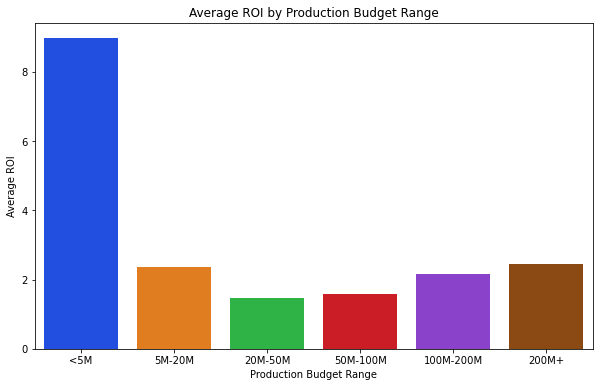

In [49]:
# Calculate ROI to guide budget allocation
df_tsv3['ROI'] = (df_tsv3['worldwide_gross'] - df_tsv3['production_budget']) / df_tsv3['production_budget']

# Create Budget Bins
budgetBins = [0, 5000000, 20000000, 50000000, 100000000, 200000000, 500000000]
budgetLabels = ['<5M', '5M-20M', '20M-50M', '50M-100M', '100M-200M', '200M+']
df_tsv3['budget_bin'] = pd.cut(df_tsv3['production_budget'], bins=budgetBins, labels=budgetLabels)

# Group and Plot
budgetRoi = df_tsv3.groupby('budget_bin')['ROI'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='budget_bin', y='ROI', data=budgetRoi, palette="bright")
plt.title('Average ROI by Production Budget Range')
plt.xlabel('Production Budget Range')
plt.ylabel('Average ROI')
plt.show()

This is indicates the data with less that than 5Million has higher yields the highest return on RIO .This datawill help us in allocating budget.

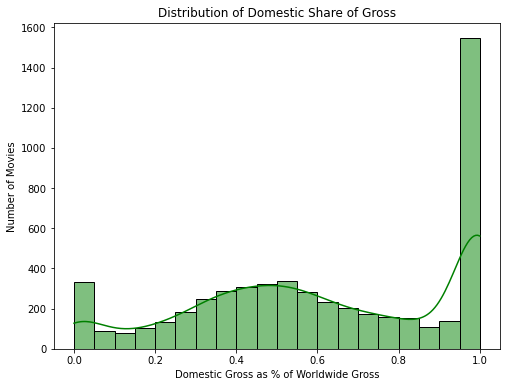

In [50]:
# Calculate Domestic Share
df_tsv3['domestic_share'] = df_tsv3['domestic_gross'] / df_tsv3['worldwide_gross']
bins = 20

plt.figure(figsize=(8,6))
sns.histplot(df_tsv3['domestic_share'], bins=bins, kde=True, color='green')
plt.title('Distribution of Domestic Share of Gross')
plt.xlabel('Domestic Gross as % of Worldwide Gross')
plt.ylabel('Number of Movies')
plt.show()


There is a huge cluster at 100% indicating that we should first focus on strong domestic perfomance to maximize profit ,spred between 30% and 70 5 for both domestic and international markets,finally international markets are there impoertant for more profitability.

# 5.EVALUATION

## conclusion

1. Objective 2 Conclusion
    - Best movie procuders with highest ratings produce documentaries
    - Best Genre to venture into is Documentary
2. Objective 1 conclusion
    - Documentaries range from short to medium runtimes.
3. Objective 3 Conclusion
    - Best studio with the highest worldwide Gross Revenue is Revenue `BV`.
4. Objective 4 Conclusion
    - Films with less than 5Million production budget has higher yields the highest return.
5. Objective 5 Conclusion
    - Intially first focus on strong domestic perfomance to maximize profit with time consider international market for more profitability